In [121]:
# for supressing warnings
import pandas as pd
import numpy as np
import time

# plotting libraries
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, multilabel_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine.data, wine.target], columns=wine.feature_names + ['quality'])
df.sample(5)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
67     12.37        1.17  1.92               19.6       78.0           2.11   
151    12.79        2.67  2.48               22.0      112.0           1.48   
177    14.13        4.10  2.74               24.5       96.0           2.05   
97     12.29        1.41  1.98               16.0       85.0           2.55   
42     13.88        1.89  2.59               15.0      101.0           3.25   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
67         2.00                  0.27             1.04             4.68  1.12   
151        1.36                  0.24             1.26            10.80  0.48   
177        0.76                  0.56             1.35             9.20  0.61   
97         2.50                  0.29             1.77             2.90  1.23   
42         3.56                  0.17             1.70             5.43  0.88   

     od280/od315_of_diluted_wines  proline  quality  
67                           3.48    510.0      1.0  
151                          1.47    480.0      2.0  
177                          1.60    560.0      2.0  
97                           2.74    428.0      1.0  
42                           3.56   1095.0      0.0

### 1. Plot pairwise relations in dataset using seaborn and give inferences.

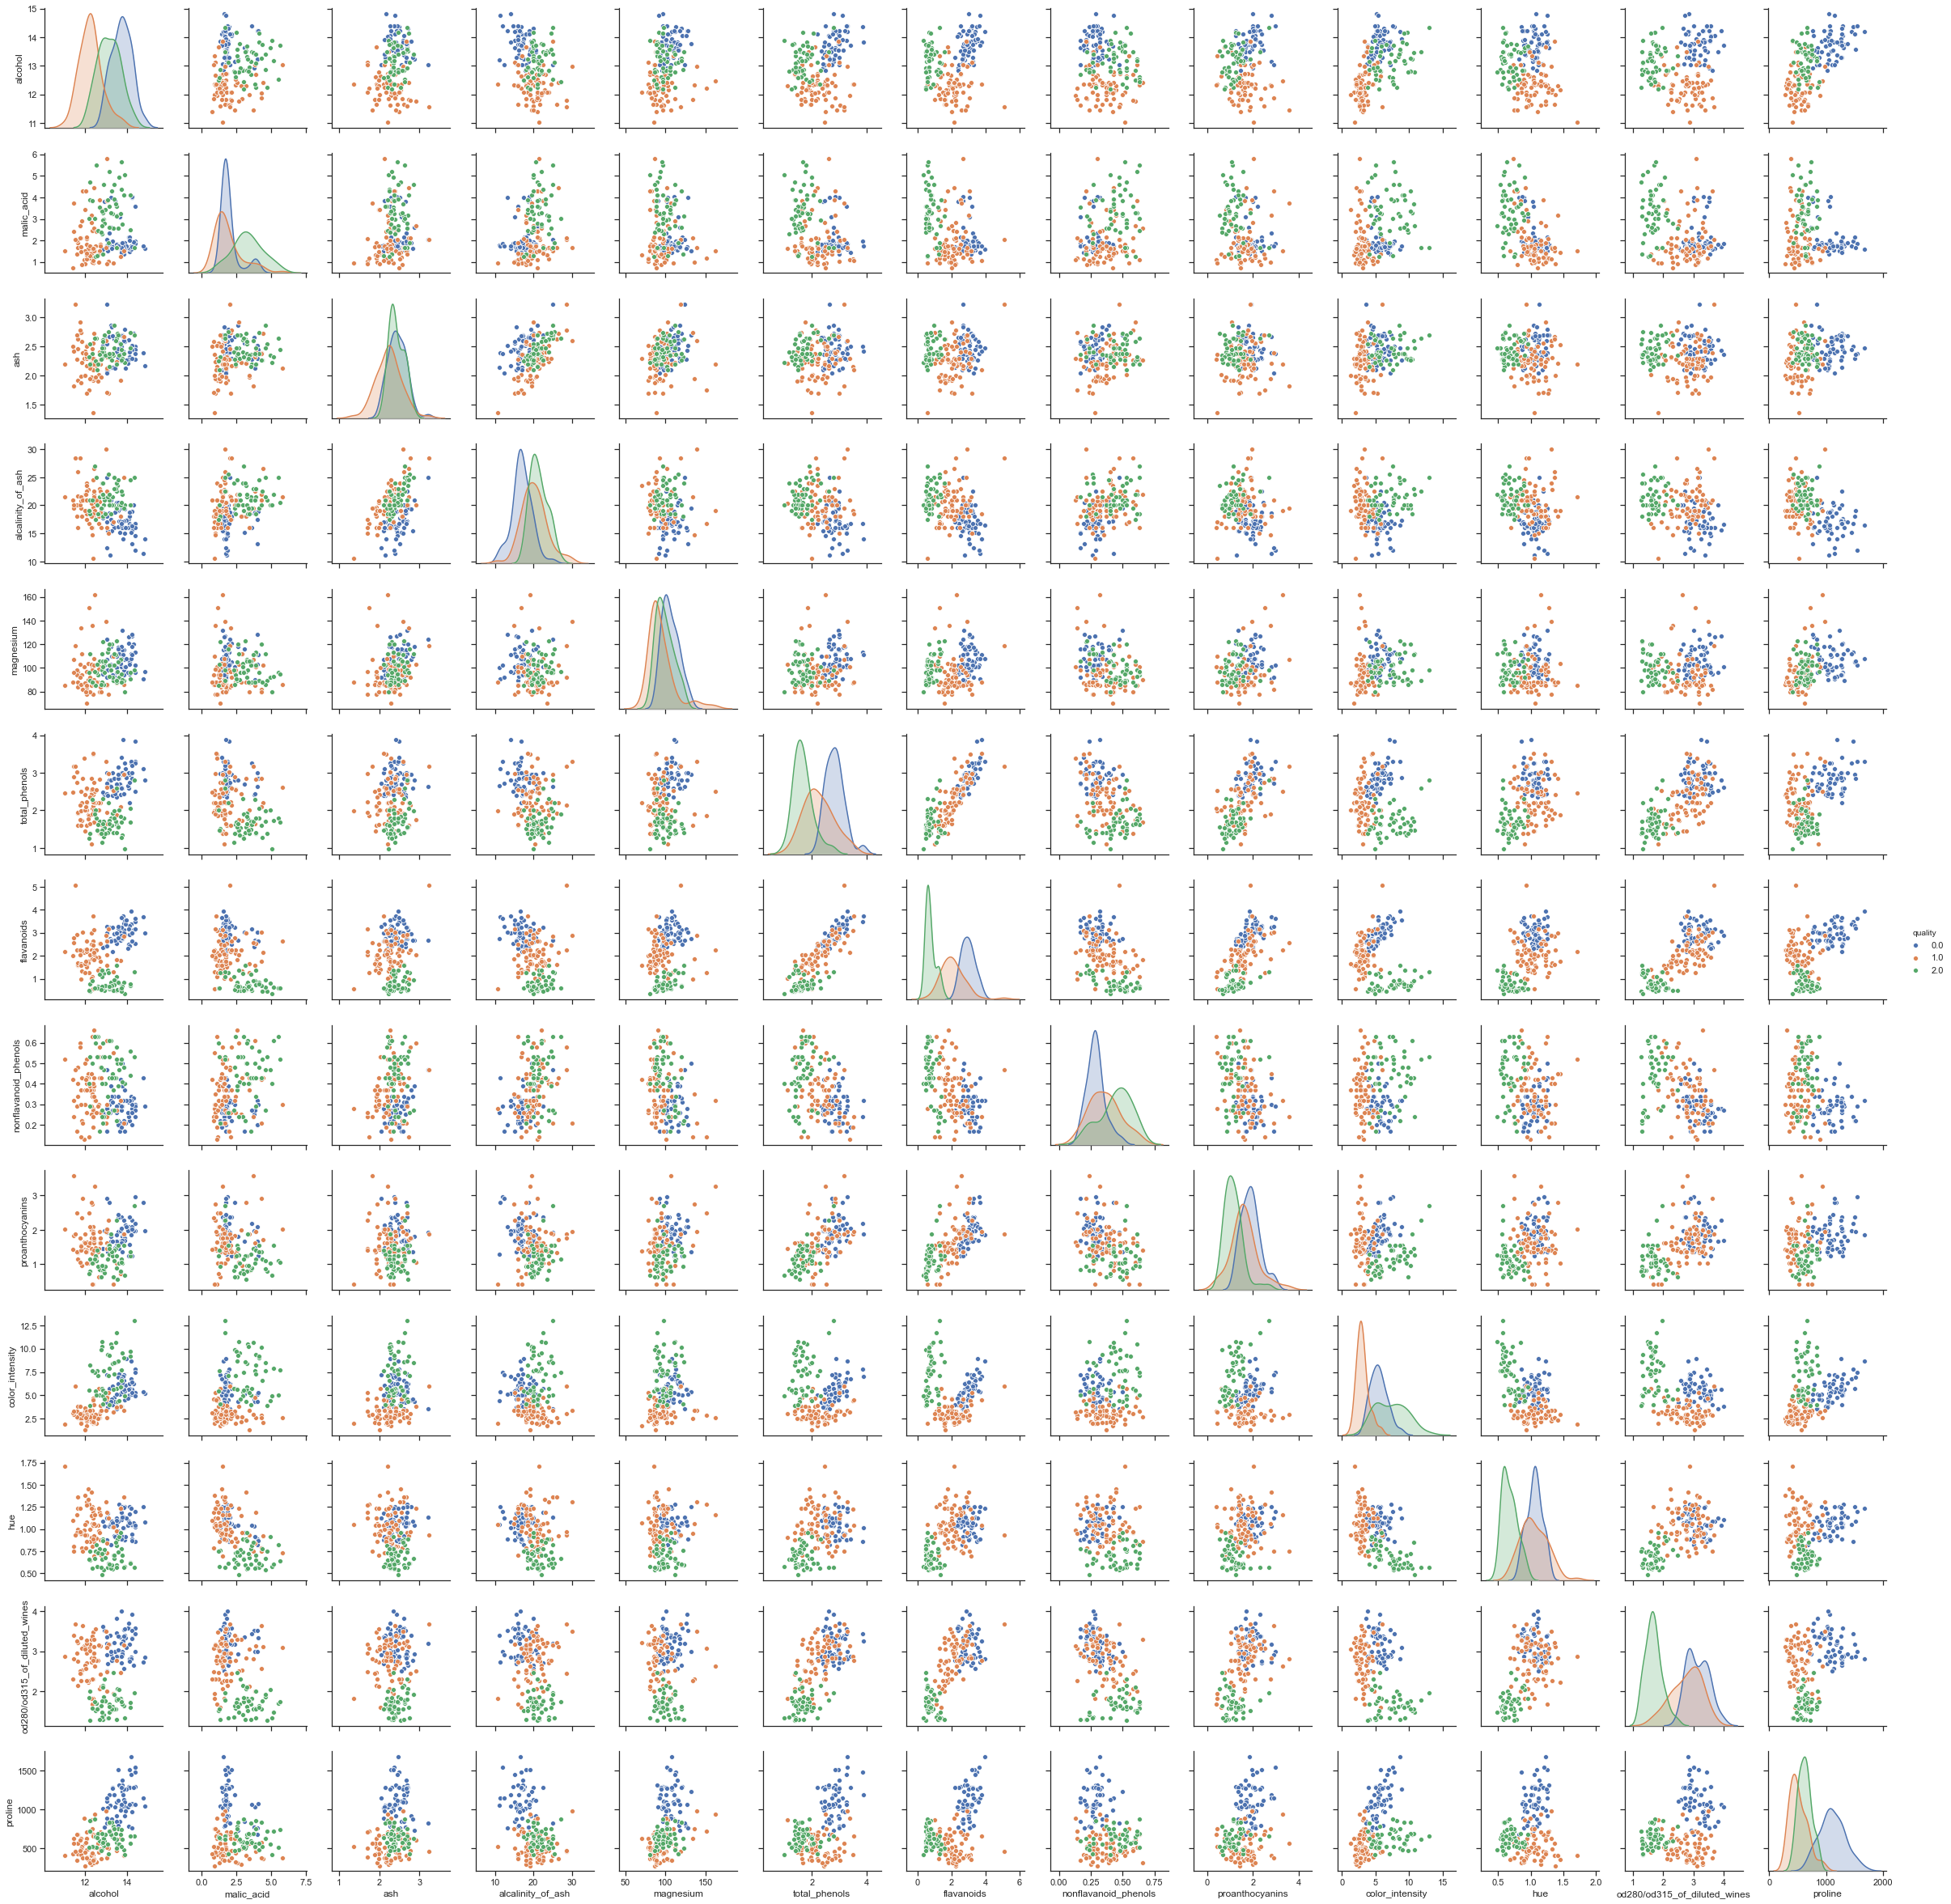

In [6]:
sns.pairplot(df, hue='quality')
plt.show()

## **Inferences** -
- When ploting **alcohol** vs other features. Wine sample with quality marked as **1** are separable with other quality of wine.
- When ploting **flavanoids** vs other features. Wine sample with quality marked as **2** are separable with other quality of wine.
- When ploting color **intensity** vs other features. Wine sample with quality marked as **1** are separable with other quality of wine.
- When ploting **hue** vs other features. Wine sample with quality marked as **2** are separable with other quality of wine.
- When ploting **od280/od315_of_diluted_wines** vs other features. Wine sample with quality marked as **2** are separable with other quality of wine.
- When ploting **proline** vs other features. Wine sample with quality marked as **0** are separable with other quality of wine.


### 2. Implement Gaussian Naive Bayes using scikit- learn and report all evaluations and any other observations that you may have.

In [150]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y = y.astype(int)
y = label_binarize(y, classes=[0, 1, 2])

In [152]:
y[0]

array([1, 0, 0])

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [156]:
start = time.time()
gnb = OneVsRestClassifier(GaussianNB()).fit(X_train, y_train)
stop = time.time()
gnbtm = stop - start
y_pred = gnb.predict(X_test)
y_score = gnb.predict_proba(X_test)

In [158]:
gnbf1 = f1_score(y_test, y_pred, average='macro')

In [160]:
gnbacc = accuracy_score(y_test, y_pred)

In [195]:
def auc_curve(y_test, y_score):
    n_classes = 3
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = list(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.2, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for all classes')
    plt.legend(loc="lower right")
    plt.show()

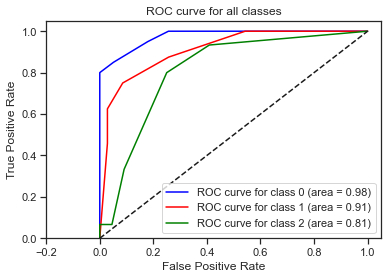

In [196]:
auc_curve(y_test, y_score)

In [197]:
gnbcm = multilabel_confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

### 3. Use Scikit-learn’s DecisionTree and tune the hyper-parameters(Height/splitting criteria) balancing the run time and accuracy. Report all evaluations and observations.

In [198]:
start = time.time()
clf = OneVsRestClassifier(DecisionTreeClassifier(max_depth=4)).fit(X_train, y_train)
stop = time.time()
dttm = stop - start
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [199]:
dtf1 = f1_score(y_test, y_pred, average='macro')

In [200]:
dtacc = accuracy_score(y_test, y_pred)

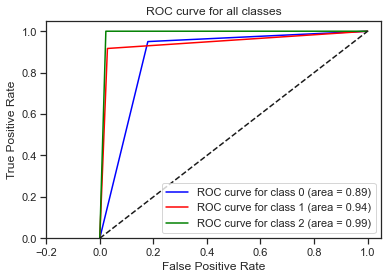

In [201]:
auc_curve(y_test, y_score)

In [202]:
dtcm = multilabel_confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

### 4. Implement KNN using scikit-learn and report all evaluations and any other observations that you may have.

In [203]:
start = time.time()
clf = OneVsRestClassifier(KNeighborsClassifier()).fit(X_train, y_train)
stop = time.time()
knntm = stop - start
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [204]:
knnf1 = f1_score(y_test, y_pred, average='macro')

In [205]:
knnacc = accuracy_score(y_test, y_pred)

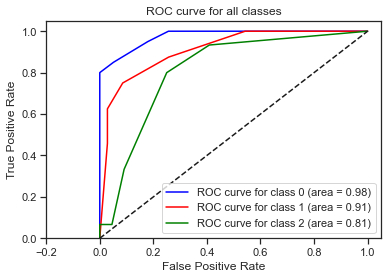

In [206]:
auc_curve(y_test, y_score)

In [207]:
knncm = multilabel_confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

### 5.Compare the above four models (Gaussian Naive Bayes, KNN and Decision Tree) on all evaluations and training time. Defend the best model for the dataset used.

In [208]:
print("F1 score for Gaussian Naive Bayes: ", gnbf1)
print("F1 score for KNN: ", knnf1)
print("F1 score for Decision Tree: ", dtf1)

F1 score for Gaussian Naive Bayes:  0.9538239538239538
F1 score for KNN:  0.696153846153846
F1 score for Decision Tree:  0.9099997015905226


In [209]:
print("Accuracy for Gaussian Naive Bayes: ", gnbacc)
print("Accuracy for KNN: ", knnacc)
print("Accuracy for Decision Tree: ", dtf1)

Accuracy for Gaussian Naive Bayes:  0.9152542372881356
Accuracy for KNN:  0.6779661016949152
Accuracy for Decision Tree:  0.9099997015905226


In [210]:
print("Training Time for Gaussian Naive Bayes: ", gnbtm)
print("Training Time for KNN: ", knntm)
print("Training Time for Decision Tree: ", dttm)

Training Time for Gaussian Naive Bayes:  0.011213302612304688
Training Time for KNN:  0.008323431015014648
Training Time for Decision Tree:  0.012909173965454102


In [211]:
print("Confusion Matrix for Gaussian Naive Bayes: \n", gnbcm)
print()
print("Confusion Matrix for KNN: \n", knncm)
print()
print("Confusion Matrix for Decision Tree: \n", dtcm)

Confusion Matrix for Gaussian Naive Bayes: 
 [[[37  2]
  [ 3 17]]

 [[32  3]
  [ 6 18]]

 [[40  4]
  [10  5]]]

Confusion Matrix for KNN: 
 [[[37  2]
  [ 3 17]]

 [[32  3]
  [ 6 18]]

 [[40  4]
  [10  5]]]

Confusion Matrix for Decision Tree: 
 [[[32  7]
  [ 1 19]]

 [[34  1]
  [ 2 22]]

 [[43  1]
  [ 0 15]]]


## Evaluations:
- ** F1 Score:- ** Gaussian Naive Bayes has the best f1 score as compared to other i.e. 0.95
- ** Accuracy:- ** Decision Tree: has the best accuracy as compared to other i.e. 91.8% and Gaussian Naive Bayes has accuracy score of 91.5% which is a very minor difference.
- ** Training Time:- ** Gaussian Naive Bayes has the best training time as compared to other i.e. 0.011s.

## Final Result: **Gaussian Naive Bayes** is the best among all three algorithms for this particular dataset.